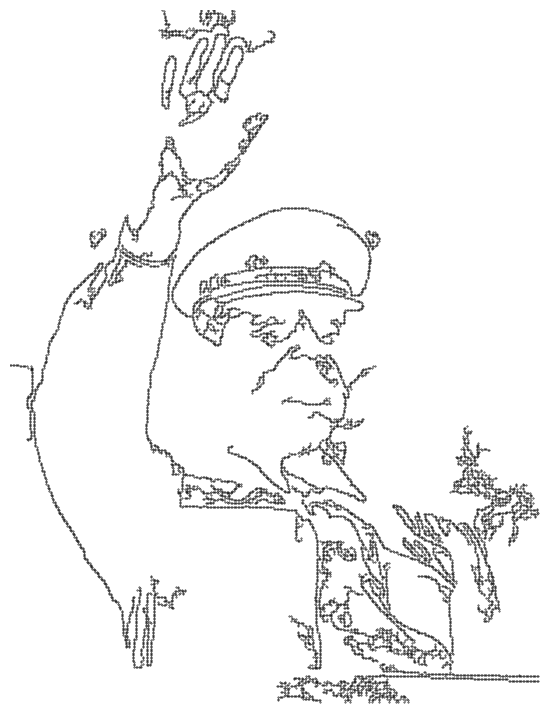

In [169]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in color
image_path = "OIP.jpg" 
image = cv2.imread(image_path)

# Resize the image to retain a moderate level of detail
scale_factor = 0.8  # Adjust scale factor for desired detail level
image = cv2.resize(image, (int(image.shape[1] * scale_factor), int(image.shape[0] * scale_factor)))

# Apply moderate contrast enhancement
alpha = 1.3 # Increased contrast control
beta = 40    # Slight brightness increase
contrast_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Split the contrast-enhanced image into Red, Green, and Blue channels
blue_channel, green_channel, red_channel = cv2.split(contrast_image)

# Apply more selective Canny edge detection on each color channel
edges_red = cv2.Canny(red_channel, threshold1=50, threshold2=450)
edges_green = cv2.Canny(green_channel, threshold1=50, threshold2=450)
edges_blue = cv2.Canny(blue_channel, threshold1=50, threshold2=450)

# Combine edges from each color channel
edges_combined = cv2.bitwise_or(edges_red, edges_green)
edges_combined = cv2.bitwise_or(edges_combined, edges_blue)

# Get the dimensions of the processed image
height, width = edges_combined.shape
xmin, ymin = 0, -height  
xmax, ymax = width, 0    

# Plot edges as points
plt.figure(figsize=(12, 9))
plt.gca().set_aspect('equal')
plt.axis('off')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)


for y in range(edges_combined.shape[0]):
    for x in range(edges_combined.shape[1]):
        if edges_combined[y, x] == 255:  
            plt.plot(x, -y, '.', color='black', markersize=0.70)  # Use small dot size for primary edges

# Display the output
plt.show()
